## LGM VIP Internship - LetsGrowMore

### Intermediate Level Task-2 - Prediction using Decision Tree Algorithm

### AIM - Create the Decision Tree classifier and visualize it graphically

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Author : Randheer kumar

### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Checking for any null values

In [3]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* No null values

### Checking for any duplicate values

In [4]:
df.duplicated().sum()

0

* No duplicate values

### Checking for outliers

In [5]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

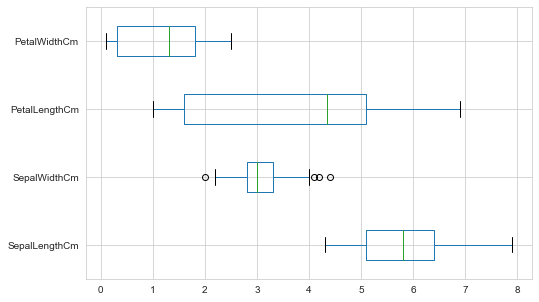

In [6]:
df.plot(kind='box',figsize=(8,5), vert=False)

* Sepalwidth seems to have outliers

### Inspecting and Analysing Data

In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.shape

(150, 5)

## Exploratory Data Analysis

<AxesSubplot:xlabel='Species', ylabel='count'>

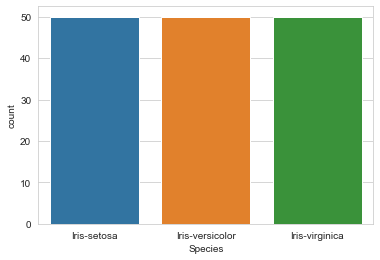

In [11]:
sns.countplot(df['Species'])

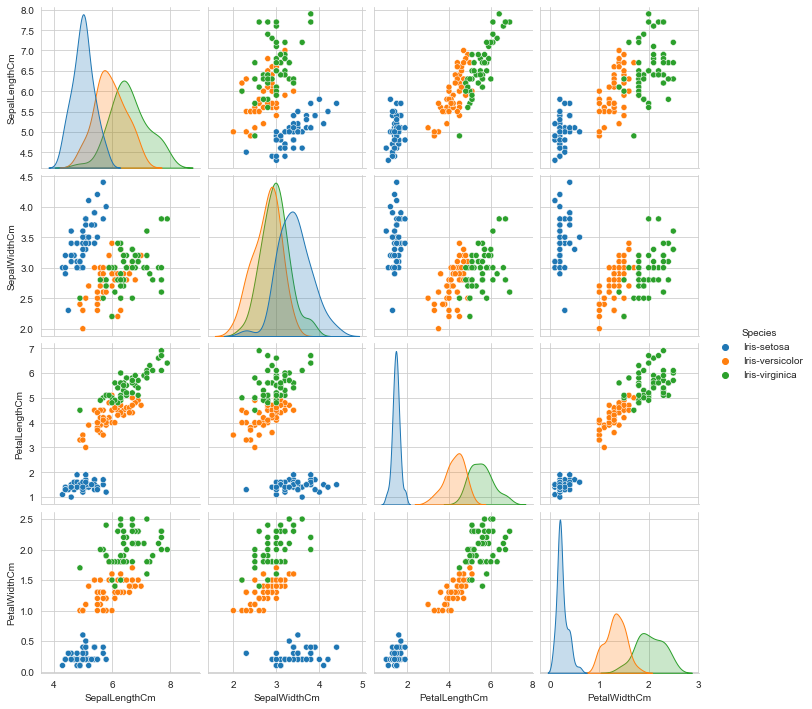

In [12]:
sns.pairplot(df, hue = 'Species', vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

<AxesSubplot:>

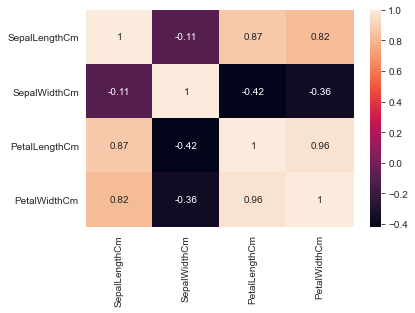

In [13]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

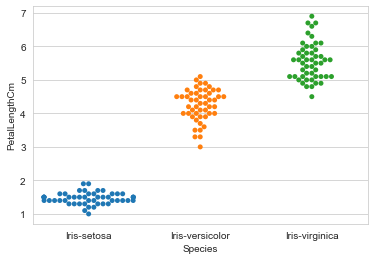

In [14]:
sns.swarmplot(x ='Species',y ='PetalLengthCm', data = df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

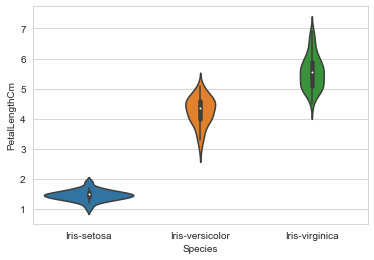

In [15]:
sns.violinplot(x ='Species',y ='PetalLengthCm', data = df)

### Getting data for training

In [16]:
label_encoder = LabelEncoder()

X = df.iloc[:,0:4].values
y = label_encoder.fit_transform(df['Species'].values)

### Train the Model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

confusion Matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score:  1.0


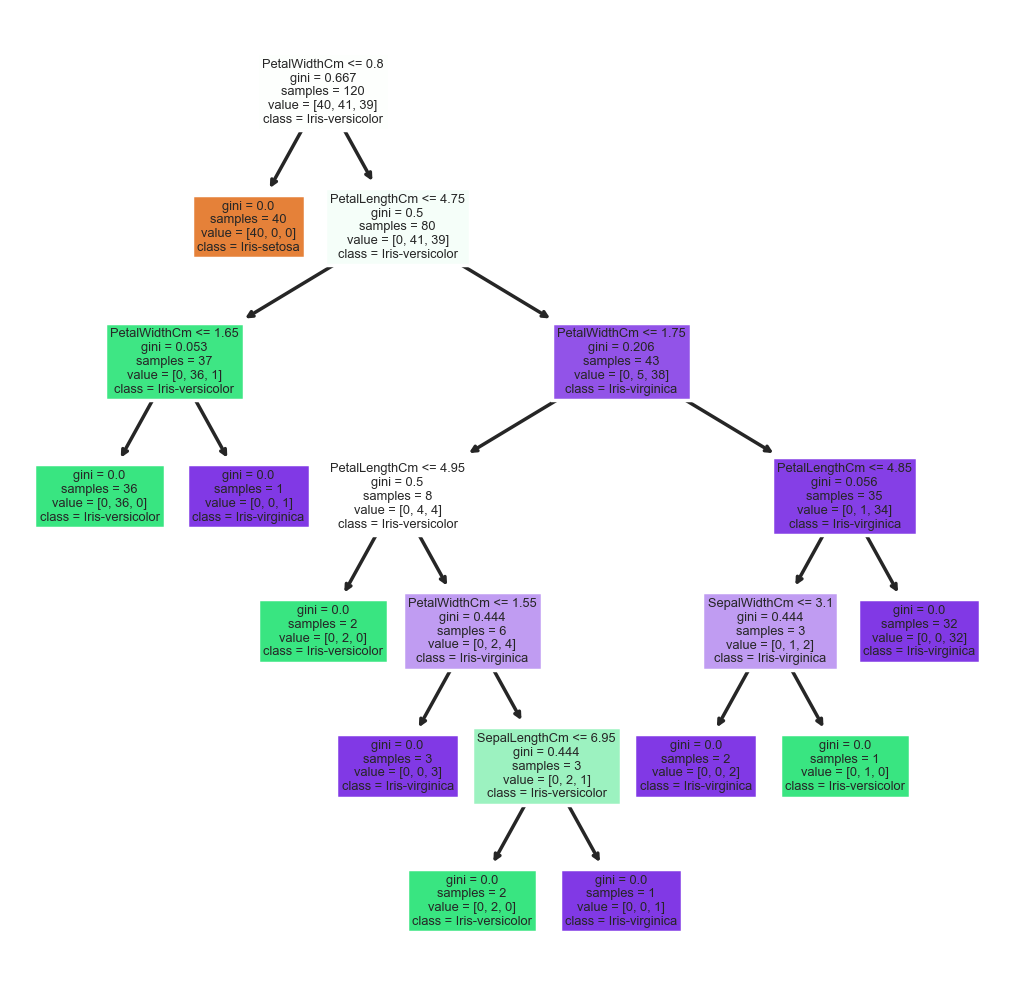

In [21]:
feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
target = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250)
tree.plot_tree( model ,feature_names=feature,class_names=target,filled=True);
#fig.savefig('Tree.png')